Figure 1 : Number of T4 cells

In [7]:
### Import packages
# similar to maria_draft.ipynb
import os
from glob import glob
import pandas as pd
#import fafbseg
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# load T4 dataset
# work pc : 'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs'
# personal pc: r'C:\Users\maria\OneDrive\Documents\GitHub\connectome-analysis-main_thesis\T4_inputs'
path = r'D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs'
filename = glob(path +"\\"+"*.xlsx")
#dataset = pd.read_excel(filename)
# what is most efficient? Load all excels in a list and then choose? or one by one?
excel_list  = []
for i in filename:
    print(f'Importing:{i}')
    excelPath = os.path.join(path,i)
    df = pd.read_excel(excelPath)
    excel_list.append(df)

Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4a_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4b_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4c_neurons_input_count_R_19Dec2023.xlsx
Importing:D:\connectome-analysis-main_thesis\connectome-analysis-main_thesis\T4_inputs\T4d_neurons_input_count_R_19Dec2023.xlsx


In [11]:
db = pd.concat(excel_list)
print(f'\n\nCell types in the database: {db.symbol.unique()}, total = {len(db.symbol.unique())}')



Cell types in the database: ['CT1' 'Mi1' 'Mi9' 'Tm3' nan 'T4a' 'Mi4' 'TmY15' 'C3' 'T4c' 'T4d' 'T4b'
 'Mi10' 'C2' 'Pm1_Tm2' 'Pm3' 'Tm2' 'PS125' 'Me-Lo-2-N.I.' 'Pm1a_Tm1'
 'TmY17' 'Dm10' 'T3' 'Pm1_Tm1' 'Pm1a_Mi1' 'Tm9' 'Tm1' 'Tm20' 'TmY10' 'Tm4'
 'Mi13' 'Pm4' 'Pm2' 'Tm16' 'ML1' 'Tm4a'], total = 36


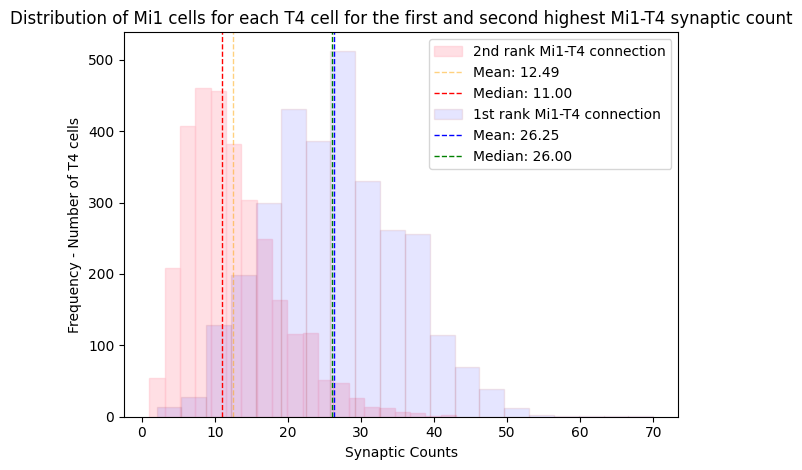

In [16]:
# Plot how many T4 cells are per Mi1 in a histogram
#symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
symbols_to_select = ['Mi1'] # here I select the Mi1s for each singular T4 cell # to run the same analysis for other neurons...change the name of the df.
db_Mi1 = db.loc[db['symbol'].isin(symbols_to_select)]

# here I find the 2nd highest Mi1 in the T4 input list
 
# Sort the DataFrame within each group (T4) by 'counts' in descending order
db_sorted = db_Mi1.sort_values(by='counts', ascending=False)
 
# Filter groups with more than one row
# lambda function filters each input (group from optic_lobe_id) for 2 and more rows
groups_with_more_than_one_row = db_sorted.groupby('optic_lobe_id').filter(lambda x: len(x) > 1)
 
# groupby to get the second row within each group
second_highest_mi1 = groups_with_more_than_one_row.groupby('optic_lobe_id').nth(1)
#print(second_highest_mi1)
plt.hist(second_highest_mi1['counts'], bins=20, edgecolor = 'pink', color='pink', alpha=0.5, label='2nd rank Mi1-T4 connection')
mean_value = second_highest_mi1['counts'].mean()
median_value = second_highest_mi1['counts'].median()
plt.axvline(mean_value, color='orange',alpha=0.5, linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

# Filter through the highest Mi1 contributor for each T4 cell
highest_mi1 = db_Mi1.groupby('optic_lobe_id').agg({'counts': 'max'}).reset_index()
# Plot the histogram for the highest Mi1-T4 synaptic count
plt.hist(highest_mi1['counts'], bins=20, edgecolor='brown', color='blue', alpha=0.1, label='1st rank Mi1-T4 connection')
mean_value = highest_mi1['counts'].mean()
median_value = highest_mi1['counts'].median()
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

plt.xlabel('Synaptic Counts')
plt.ylabel('Frequency - Number of T4 cells')
plt.title('Distribution of Mi1 cells for each T4 cell for the first and second highest Mi1-T4 synaptic count')
plt.legend()
plt.tight_layout()
plt.savefig('Distribution of Mi1 cells for each T4 cell for the first and second highest Mi1-T4 synaptic count.png')
plt.show()

In [29]:
# load dataset for each Mi1 its T4 output, this takes a minute to run...
db_Mi1 = pd.read_excel(r'C:\Users\maria\OneDrive\Documents\GitHub\connectome-analysis-main_thesis\Mi1_outputs\Mi1_neurons_output_count_R_25Jan2024.xlsx')
### Filter through the outputs of Mi1 to find T4s
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]

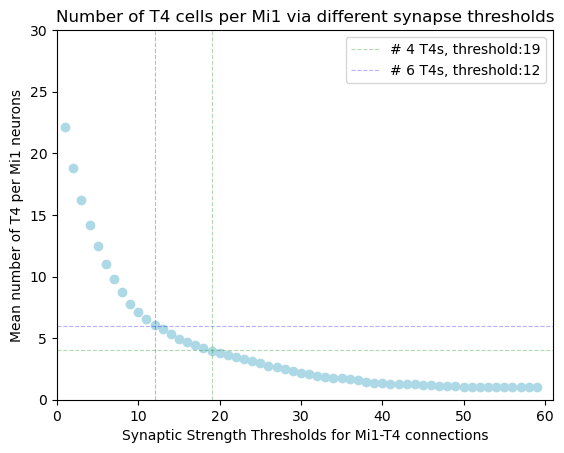

In [30]:
#### Here I need to plot the number of mean T4 cells per Mi1 depending on the synapse threshold derive from the dual distribution above.
#### How do I decide the range of thresholds? >75% of each daatset..? How arbitrary...
# calculate mean for a range of thresholds with a step of 1, and store it to an array and plot against threshold count
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]
### set threshold & filter the database
threshold = np.arange(1,60,1) # (1,60,1) , (10,21,1)or why don't I just do the whole range and put a pretty colored low oppacity background on the range of intreset...?

# initiate empty lists
number_of_t4 = []
mean_for_each_mi1 = []
# calculate the mean for each Mi1 neuron
for i,value in enumerate (threshold):
    db_Mi1_T4 = db_Mi1[db_Mi1['counts']>=value]
    number_of_t4.append(db_Mi1_T4.groupby('optic_lobe_id').size().values)  # number of cells not counts...remember for lists you have to append
    # now the number_of_t4 has the number of T4s per Mi1 in a list ss
    mean_for_each_mi1.append(np.mean(number_of_t4[i]))

### plotting    
plt.scatter(threshold, mean_for_each_mi1, color = 'lightblue' )
plt.ylim(0,30)
plt.xlim(0,61)
plt.axhline(4, color='green', alpha = 0.3, linestyle = 'dashed', linewidth = 0.8, label='# 4 T4s, threshold:19')
plt.axhline(6, color='blue', alpha = 0.3, linestyle = 'dashed', linewidth = 0.8,label = '# 6 T4s, threshold:12')
plt.axvline(19, color='green', alpha = 0.3, linestyle = 'dashed', linewidth = 0.8)
plt.axvline(12, color='blue', alpha = 0.3, linestyle = 'dashed', linewidth = 0.8)
plt.xlabel('Synaptic Strength Thresholds for Mi1-T4 connections')
plt.ylabel('Mean number of T4 per Mi1 neurons')
plt.title('Number of T4 cells per Mi1 via different synapse thresholds')
plt.legend()
plt.savefig('Number of T4 cells under different threholds (entire range).png')

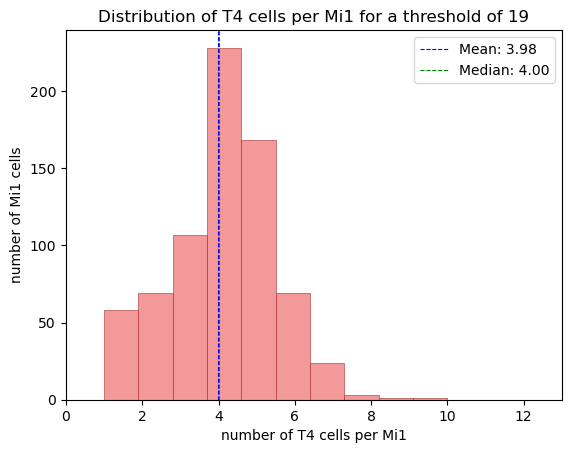

In [24]:
## Now I would like to plot for each threshold a distribution of the number of T4 cells for the Mi1s 
## this will allow me to investigate if the distributions are wide, and whether I can take the mean..
thres = 18
thres = threshold[thres] # threshold 20 would be in position 19
plt.hist(number_of_t4[thres], color = 'lightcoral', edgecolor = 'brown', linewidth = 0.5, alpha =0.8)
plt.ylabel('number of Mi1 cells')
plt.xlabel('number of T4 cells per Mi1')
plt.title(f'Distribution of T4 cells per Mi1 for a threshold of {thres}')
mean_value = np.mean(number_of_t4[thres])
median_value = np.median(number_of_t4[thres])
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=0.8, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=0.8, label=f'Median: {median_value:.2f}')
plt.xlim(0,13)
plt.savefig(f'Distribution of T4 cells per Mi1 for a threshold of {thres}')
plt.legend()

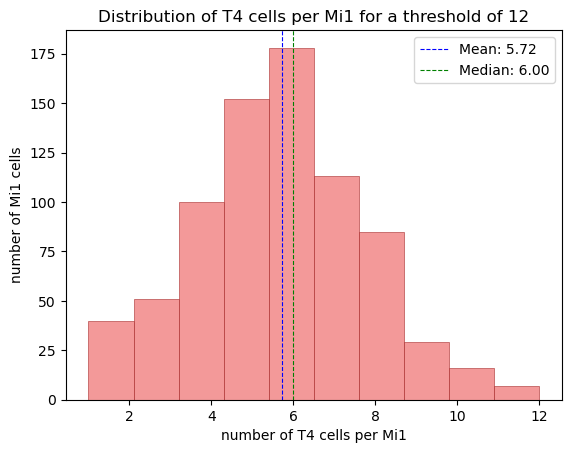

In [26]:
## Now I would like to plot for each threshold a distribution of the number of T4 cells for the Mi1s 
## this will allow me to investigate if the distributions are wide, and whether I can take the mean..
thres = 11 # threshold 20 would be in position 19
thres = threshold[thres] 
plt.hist(number_of_t4[thres], color = 'lightcoral', edgecolor = 'brown', linewidth = 0.5, alpha = 0.8)
plt.ylabel('number of Mi1 cells')
plt.xlabel('number of T4 cells per Mi1')
plt.title(f'Distribution of T4 cells per Mi1 for a threshold of {thres}')
mean_value = np.mean(number_of_t4[thres])
median_value = np.median(number_of_t4[thres])
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=0.8, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=0.8, label=f'Median: {median_value:.2f}')
plt.legend()

In [98]:
# load dataset for each Mi1 its T4 output
db_Mi1 = pd.read_excel(r'C:\Users\maria\OneDrive\Documents\GitHub\connectome-analysis-main_thesis\Mi1_outputs\Mi1_neurons_output_count_R_25Jan2024.xlsx')
### Filter through the outputs of Mi1 to find T4s
symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
db_Mi1_T4 = db_Mi1.loc[db_Mi1['symbol'].isin(symbols_to_select)]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'C3'),
  Text(1, 0, 'TmY15'),
  Text(2, 0, 'CT1'),
  Text(3, 0, 'Mi4'),
  Text(4, 0, 'T4a'),
  Text(5, 0, 'Mi1'),
  Text(6, 0, 'Mi9'),
  Text(7, 0, 'T4b'),
  Text(8, 0, 'Tm3'),
  Text(9, 0, 'C2'),
  Text(10, 0, 'Pm1_Tm2'),
  Text(11, 0, 'Pm1a_Tm1'),
  Text(12, 0, 'Pm3'),
  Text(13, 0, 'PS125'),
  Text(14, 0, 'T4c'),
  Text(15, 0, 'T4d'),
  Text(16, 0, 'Tm16'),
  Text(17, 0, 'T3'),
  Text(18, 0, 'Me-Lo-2-N.I.'),
  Text(19, 0, 'Mi10'),
  Text(20, 0, 'Pm2'),
  Text(21, 0, 'Tm2')])

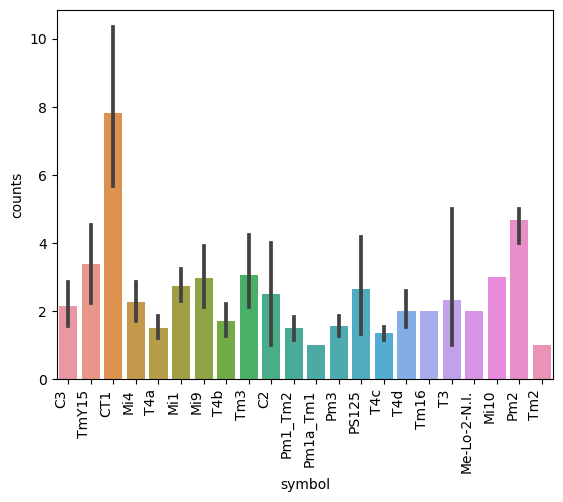

In [155]:
#### Here I will investigate the outlier of the number of T4s with a max Mi1 connections of 1-5 synapses...
# just filter through the dataframe with counts lower than 5
symbols_to_select = ['Mi1'] # here I select the Mi1s for each singular T4 cell
db_Mi1 = db.loc[db['symbol'].isin(symbols_to_select)]
#highest_mi1 = db_Mi1.loc[db_Mi1.groupby('optic_lobe_id')['counts'].idxmax()]
highest_mi1 = db_Mi1.groupby('optic_lobe_id').agg({'counts': 'max'}).reset_index()
outlier_data = highest_mi1[highest_mi1['counts'] <=5]
# after I need the inputs to these T4 cells. I need the db and filter it through those T4 cells outlier_data['optic_lobe_id]
# how can i do this : with isin
# Filter rows in db based on values in a column of outlier_data
# outlier_data here i need postsynaptic_ID, or optic_lobe_id
db = pd.concat(excel_list)
input_outlier_data = db[db['optic_lobe_id'].isin(outlier_data['optic_lobe_id'])]
# i need te box plot for each T4 cell now..For a unique optic lobe id 

# or also for all T4s
sns.barplot(x='symbol', y='counts', data=input_outlier_data)
plt.xticks(rotation=90, ha='right')

In [157]:
outlier_data[outlier_data['optic_lobe_id'] == 'T4a-R8' ]

,optic_lobe_id,counts


In [156]:
highest_mi1[highest_mi1['optic_lobe_id']=='T4a-R8']

,optic_lobe_id,counts
710,T4a-R8,29


In [158]:
input_outlier_data

,Unnamed: 0,guess,author,presynaptic_ID,counts,postsynaptic_ID,symbol,optic_lobe_id,dorso-ventral
42991,42991,Centrifugal 3; C3,104.0,720575940633423897,5,720575940629489602,C3,T4a-R711,NaN
42992,42992,Y12; https://doi.org/10.1101/2021.12.20.473513,392.0,720575940622267230,5,720575940629489602,NaN,T4a-R711,NaN
42993,42993,Y11; https://doi.org/10.1101/2021.12.20.473513,392.0,720575940615101506,5,720575940629489602,NaN,T4a-R711,NaN
42994,42994,NaN,NaN,720575940631237335,5,720575940629489602,NaN,T4a-R711,NaN
42995,42995,TmY15; Transmedullary Y neuron 15; FBbt_00048246,392.0,720575940628606980,4,720575940629489602,TmY15,T4a-R711,NaN
...,...,...,...,...,...,...,...,...,...
33217,33217,Pm1; Proximal medullary amacrine neuron 1; FBb...,27.0,720575940620983499,1,720575940647120419,Pm1_Tm2,T4d-R604,NaN
33218,33218,Pm1; Proximal medullary amacrine neuron 1; FBb...,27.0,720575940620983499,1,720575940647120419,Pm3,T4d-R604,NaN
33219,33219,Putative Translobula-plate 1; Tlp1,13.0,720575940624246247,1,720575940647120419,NaN,T4d-R604,NaN
33220,33220,NaN,NaN,720575940598587385,1,720575940647120419,NaN,T4d-R604,NaN


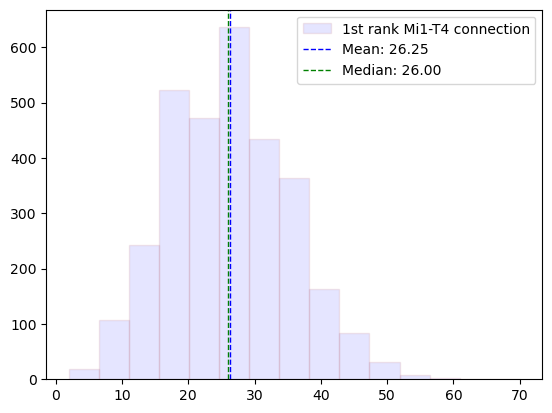

In [159]:
# Filter through the highest Mi1 contributor for each T4 cell
symbols_to_select = ['Mi1'] # here I select the Mi1s for each singular T4 cell
db_Mi1 = db.loc[db['symbol'].isin(symbols_to_select)]
#highest_mi1 = db_Mi1.loc[db_Mi1.groupby('optic_lobe_id')['counts'].idxmax()]
highest_mi1 = db_Mi1.groupby('optic_lobe_id').agg({'counts': 'max'}).reset_index()
# Plot the histogram for the highest Mi1-T4 synaptic count
plt.hist(highest_mi1['counts'], bins=15, edgecolor='brown', color='blue', alpha=0.1, label='1st rank Mi1-T4 connection')
mean_value = highest_mi1['counts'].mean()
median_value = highest_mi1['counts'].median()
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')
plt.legend()

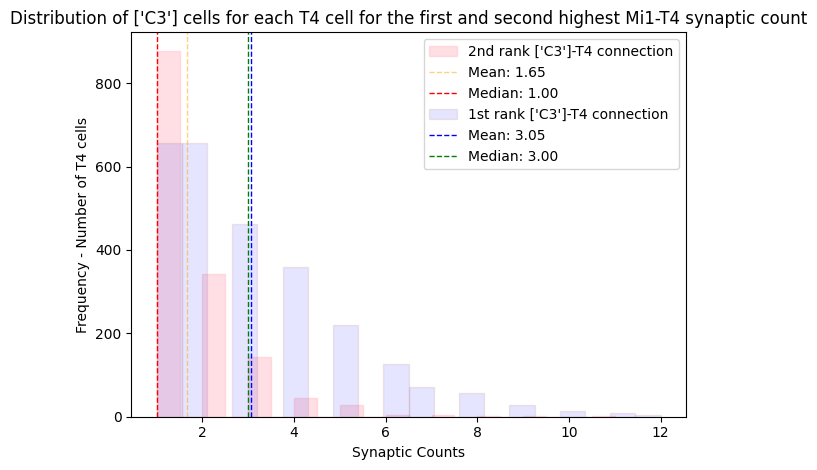

In [15]:
# here I make functions for the above plots, so it can be generalized for other cell types: 
# I want to check the distributions of other unicolumnar neurons with T4s : Mi9, Mi4, C3

# Plot how many T4 cells are per Mi1 in a histogram
#symbols_to_select = ['T4a', 'T4b', 'T4c', 'T4d']
symbols_to_select = ['C3'] # here I select the Mi1s for each singular T4 cell # to run the same analysis for other neurons...change the name of the df.
db_Mi1 = db.loc[db['symbol'].isin(symbols_to_select)]

# here I find the 2nd highest Mi1 in the T4 input list
 
# Sort the DataFrame within each group (T4) by 'counts' in descending order
db_sorted = db_Mi1.sort_values(by='counts', ascending=False)
 
# Filter groups with more than one row
# lambda function filters each input (group from optic_lobe_id) for 2 and more rows
groups_with_more_than_one_row = db_sorted.groupby('optic_lobe_id').filter(lambda x: len(x) > 1)
 
# groupby to get the second row within each group
second_highest_mi1 = groups_with_more_than_one_row.groupby('optic_lobe_id').nth(1)
#print(second_highest_mi1)
plt.hist(second_highest_mi1['counts'], bins=20, edgecolor = 'pink', color='pink', alpha=0.5, label=f'2nd rank {symbols_to_select}-T4 connection')
mean_value = second_highest_mi1['counts'].mean()
median_value = second_highest_mi1['counts'].median()
plt.axvline(mean_value, color='orange',alpha=0.5, linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

# Filter through the highest Mi1 contributor for each T4 cell
highest_mi1 = db_Mi1.groupby('optic_lobe_id').agg({'counts': 'max'}).reset_index()
# Plot the histogram for the highest Mi1-T4 synaptic count
plt.hist(highest_mi1['counts'], bins=20, edgecolor='brown', color='blue', alpha=0.1, label=f'1st rank {symbols_to_select}-T4 connection')
mean_value = highest_mi1['counts'].mean()
median_value = highest_mi1['counts'].median()
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

plt.xlabel('Synaptic Counts')
plt.ylabel('Frequency - Number of T4 cells')
plt.title(f'Distribution of {symbols_to_select} cells for each T4 cell for the first and second highest Mi1-T4 synaptic count')
plt.legend()
plt.tight_layout()
plt.savefig(f'Distribution of {symbols_to_select} cells for each T4 cell for the first and second highest Mi1-T4 synaptic count.png')
plt.show()

Automatize above code